# Torch Datasets

In [25]:

import numpy as np 
import pandas as pd
import os
from tqdm import tqdm 
import matplotlib.pyplot as plt
import torch 
import torchaudio 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset 



In [6]:
libri = torchaudio.datasets.LIBRISPEECH(root = '/Users/stephen/Desktop/Automatic_Music_Generation/Data',download=True)

100%|██████████| 5.95G/5.95G [10:35<00:00, 10.1MB/s]  


In [8]:
len(libri)

28539

In [21]:
libri[20][0]

tensor([[ 0.0043,  0.0037,  0.0022,  ..., -0.0066, -0.0072, -0.0076]])

In [17]:
libri[0]

(tensor([[-0.0065, -0.0055, -0.0062,  ...,  0.0033,  0.0005, -0.0095]]),
 16000,
 'CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED MISSUS RACHEL LYNDE LIVED JUST WHERE THE AVONLEA MAIN ROAD DIPPED DOWN INTO A LITTLE HOLLOW FRINGED WITH ALDERS AND LADIES EARDROPS AND TRAVERSED BY A BROOK',
 103,
 1240,
 0)

# Wav2Vec2

In [15]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
print("Sample Rate:", bundle.sample_rate)
print("Labels:", bundle.get_labels())

Sample Rate: 16000
Labels: ('<s>', '<pad>', '</s>', '<unk>', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [16]:
model = bundle.get_model()
print(model.__class__)

<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [24]:
waveform = libri[100][0]
with torch.inference_mode():
  features, _ = model.extract_features(waveform)


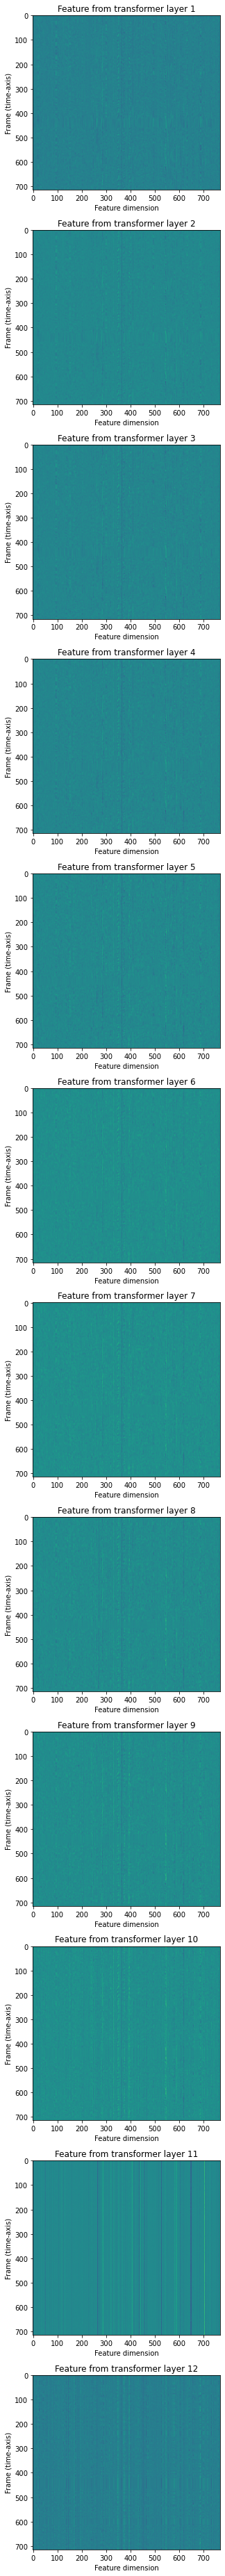

In [26]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
  ax[i].imshow(feats[0].cpu())
  ax[i].set_title(f"Feature from transformer layer {i+1}")
  ax[i].set_xlabel("Feature dimension")
  ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [27]:
with torch.inference_mode():
  emission, _ = model(waveform)
